In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [2]:
from models import ColorizationNet
from imagenet_data_loader import get_imagenet_data_loader

In [3]:
(x_train, _), (_, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0

In [4]:
def downscale(batch):
    return batch[..., ::3, ::3]

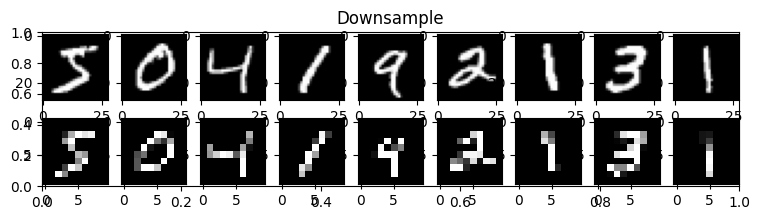

In [5]:
plt.figure(figsize=(9, 2))
plt.title("Downsample")
plt.gray()
for i, img in enumerate(x_train[:9]):
    plt.subplot(2, 9, i+1)
    plt.imshow(img.reshape(28, 28))
for i, img in enumerate(x_train[:9]):
    plt.subplot(2, 9, 9+i+1)
    plt.imshow(downscale(img))

In [6]:
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
EPOCHS = 20
BATCH_SIZE = 128
LEARNING_RATE = 0.002

model = ConvUpscaleAutoEncoder().to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
criterion = torch.nn.MSELoss()
inspections = []

for epoch in range(EPOCHS):
    print("Epoch: " + str(epoch + 1) + "/" + str(EPOCHS))
    epoch_loss = 0
    updates = 0

    for i in range(0, len(x_train), BATCH_SIZE):
        batch = x_train[i:i + BATCH_SIZE]

        # downscale batch
        downscaled_batch = downscale(batch.copy())

        batch = batch.reshape(-1, 1, 28, 28)
        batch = torch.from_numpy(batch).to(DEVICE)
        downscaled_batch = downscaled_batch.reshape(-1, 1, downscaled_batch.shape[1], downscaled_batch.shape[2])
        downscaled_batch = torch.from_numpy(downscaled_batch).to(DEVICE)

        # forward pass
        output = model(downscaled_batch)
        loss = criterion(output, batch)

        epoch_loss += loss.item()

        # backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        updates += 1

        print(
            "update: " + str(updates) + "/" + str(len(x_train)//BATCH_SIZE + 1) + " | " +
            "loss: " + str(round(epoch_loss/updates, 4)) + " "*10, end="\r")

    print(
        "update: " + str(updates) + "/" + str(len(x_train)//BATCH_SIZE + 1) + " | " +
        "loss: " + str(round(epoch_loss/updates, 4)) + " "*10)

    if (epoch % 2 == 0 and len(inspections) < 4) or epoch == EPOCHS - 1:
        inspections.append((
            epoch, 
            downscaled_batch.to("cpu").detach().numpy(), 
            output.to("cpu").detach().numpy()
        ))

Epoch: 1/20
update: 469/469 | loss: 0.0434          
Epoch: 2/20
update: 469/469 | loss: 0.0213          
Epoch: 3/20
update: 469/469 | loss: 0.0188          
Epoch: 4/20
update: 469/469 | loss: 0.0175          
Epoch: 5/20
update: 469/469 | loss: 0.0166          
Epoch: 6/20
update: 469/469 | loss: 0.016           
Epoch: 7/20
update: 469/469 | loss: 0.0155          
Epoch: 8/20
update: 469/469 | loss: 0.0151          
Epoch: 9/20
update: 469/469 | loss: 0.0148          
Epoch: 10/20
update: 469/469 | loss: 0.0145          
Epoch: 11/20
update: 469/469 | loss: 0.0142          
Epoch: 12/20
update: 469/469 | loss: 0.014           
Epoch: 13/20
update: 469/469 | loss: 0.0138          
Epoch: 14/20
update: 469/469 | loss: 0.0136          
Epoch: 15/20
update: 469/469 | loss: 0.0134          
Epoch: 16/20
update: 469/469 | loss: 0.0132          
Epoch: 17/20
update: 469/469 | loss: 0.0131          
Epoch: 18/20
update: 469/469 | loss: 0.013           
Epoch: 19/20
update: 469/469 | loss: 

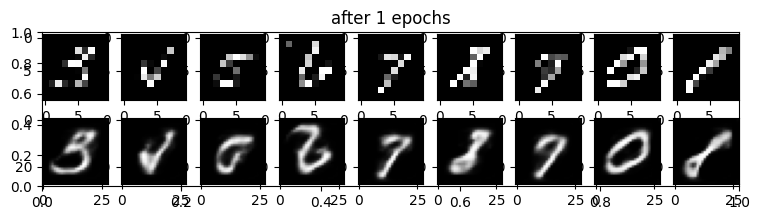

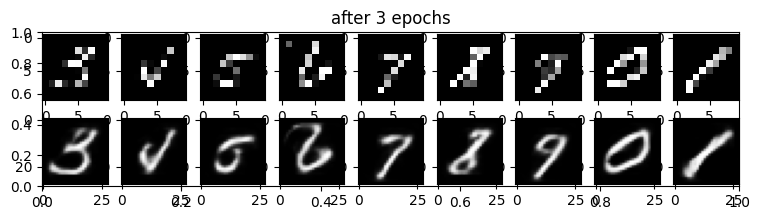

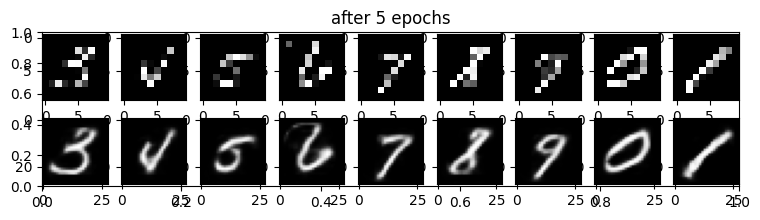

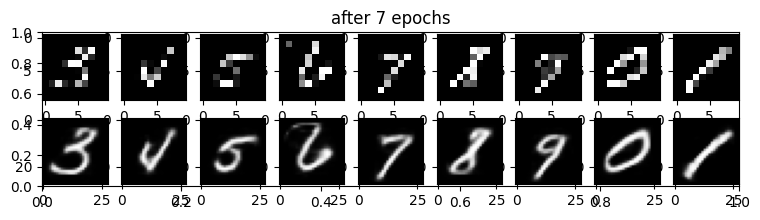

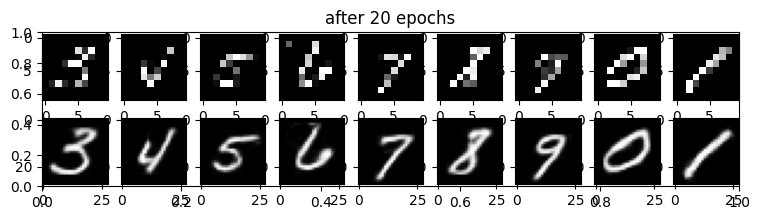

In [7]:
# examine how proficient the network is at upscaling over epochs
for epoch, imgs, recons in inspections:
    plt.figure(figsize=(9, 2))
    plt.title("after " + str(epoch + 1) + " epochs")
    plt.gray()
    for i, img in enumerate(imgs[:9]):
        plt.subplot(2, 9, i+1)
        plt.imshow(img.reshape(10, 10))
    for i, recon in enumerate(recons[:9]):
        plt.subplot(2, 9, 9+i+1)
        plt.imshow(recon.reshape(28, 28))